<img src="imgs/IISc_Master_Seal_Black_Transparent.png" height="120px" width="120px" align="right" />

<img src="imgs/logoGESS.jpg" height="120px" width="120px" align="right" />

<font face="Calibri">
<font size="7"> <b> PySHBundle Tutorials </b> </font>
<br> 
<font size="5"> <b> Tutorial 2: Visualizations with PySHBundle<font color='rgba(200,0,0,0.2)'>  </font> </b> </font>
<br> <br>
    
<font size="3"> <b> by: Abhishek Mhamane, IIT Kanpur</b> 
<font size="2">  <br>
<font> <b>Date: </b> August 27, 2023 </font>
</font>


In [1]:
import os
os.chdir('D:\open_source\pyshbundle')

import pyshbundle
from tqdm import trange
from datetime import datetime

from pyshbundle.new_io import read_jpl, read_csr, read_tn13, read_tn14, extract_C10_11_replcmnt_coeff, cklm2sc_new
from pyshbundle.new_io import extract_C20_replcmnt_coeff, extract_C30_replcmnt_coeff, replace_zonal_coeff, find_date_in_replacemnt_file
from pyshbundle.new_io import read_itsg

import numpy as np
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pandas as pd
import xarray as xr

In [2]:
import pyshbundle.reader_replacer_jpl
import pyshbundle.reader_replacer_csr
import pyshbundle.reader_replacer_itsg

from pyshbundle import gshs, plm, sc2cs
from pyshbundle.clm2sc import clm2sc_new
from pyshbundle.clm2cs import clm2cs_new

In [3]:
from pyshbundle.visualisation_utils import sc_triplot, cs_sqplot, ylm, ylm_plot, mapfield, polar_plot

## Load Data

In [4]:
tn14_path_itsg = 'D:\\open_source\\pyshbundle\pyshbundle\\data\\ITSG_TN_files\\TN-14_C30_C20_SLR_GSFC.txt'
tn_13_path_itsg = 'D:\\open_source\\pyshbundle\\pyshbundle\\data\\ITSG_TN_files\\TN-13_GEOC_CSR_RL06.1.txt'
itsg_folder = 'D:\\open_source\\pyshbundle\\sample_input_data\\ITSG_input'
itsg_file = 'D:\\open_source\\pyshbundle\\sample_input_data\\ITSG_input\\ITSG-Grace2018_n96_2011-05.gfc'

In [5]:
data_itsg_mat= np.ndarray((4753, 6))
header = read_itsg(itsg_file)[0]
data_itsg_mat = read_itsg(itsg_file)[1]
dates_itsg = read_itsg(itsg_file)[2]

In [6]:
scmat_itsg, devscmat_itsg = clm2sc_new(data_itsg_mat, lmax=96, sigma_flag=True)

In [7]:
# Read replacemnt file
data_tn13_itsg = read_tn13(tn_13_path_itsg)
data_tn14_itsg = read_tn14(tn14_path_itsg)

In [8]:
replaced_data_mat = replace_zonal_coeff(data_itsg_mat, 'itsg', 96, data_tn13_itsg, data_tn14_itsg, dates_itsg, epoch_end=None)

Data Date - 2011-05-01, replacemnt date(tn-13) = 2011-05-01
Data Date - 2011-05-01, replacemnt date(tn-13) = 2011-05-01
[1.00000000e+00 0.00000000e+00 1.92070086e-12 0.00000000e+00
 4.45850000e-11 0.00000000e+00] [ 1.00000000e+00  1.00000000e+00  1.19237304e-10 -1.66149501e-10
  4.52960000e-11  5.07240000e-11]
Data Date - 2011-05-01, replacemnt date (tn-14)_ = 2011-05-01
Data Date - 2011-05-01, replacemnt date (tn-14)_ = 2011-05-01


In [9]:
rep_sc, rep_dev = clm2sc_new(replaced_data_mat, lmax=96, sigma_flag=True)

# Visualise data

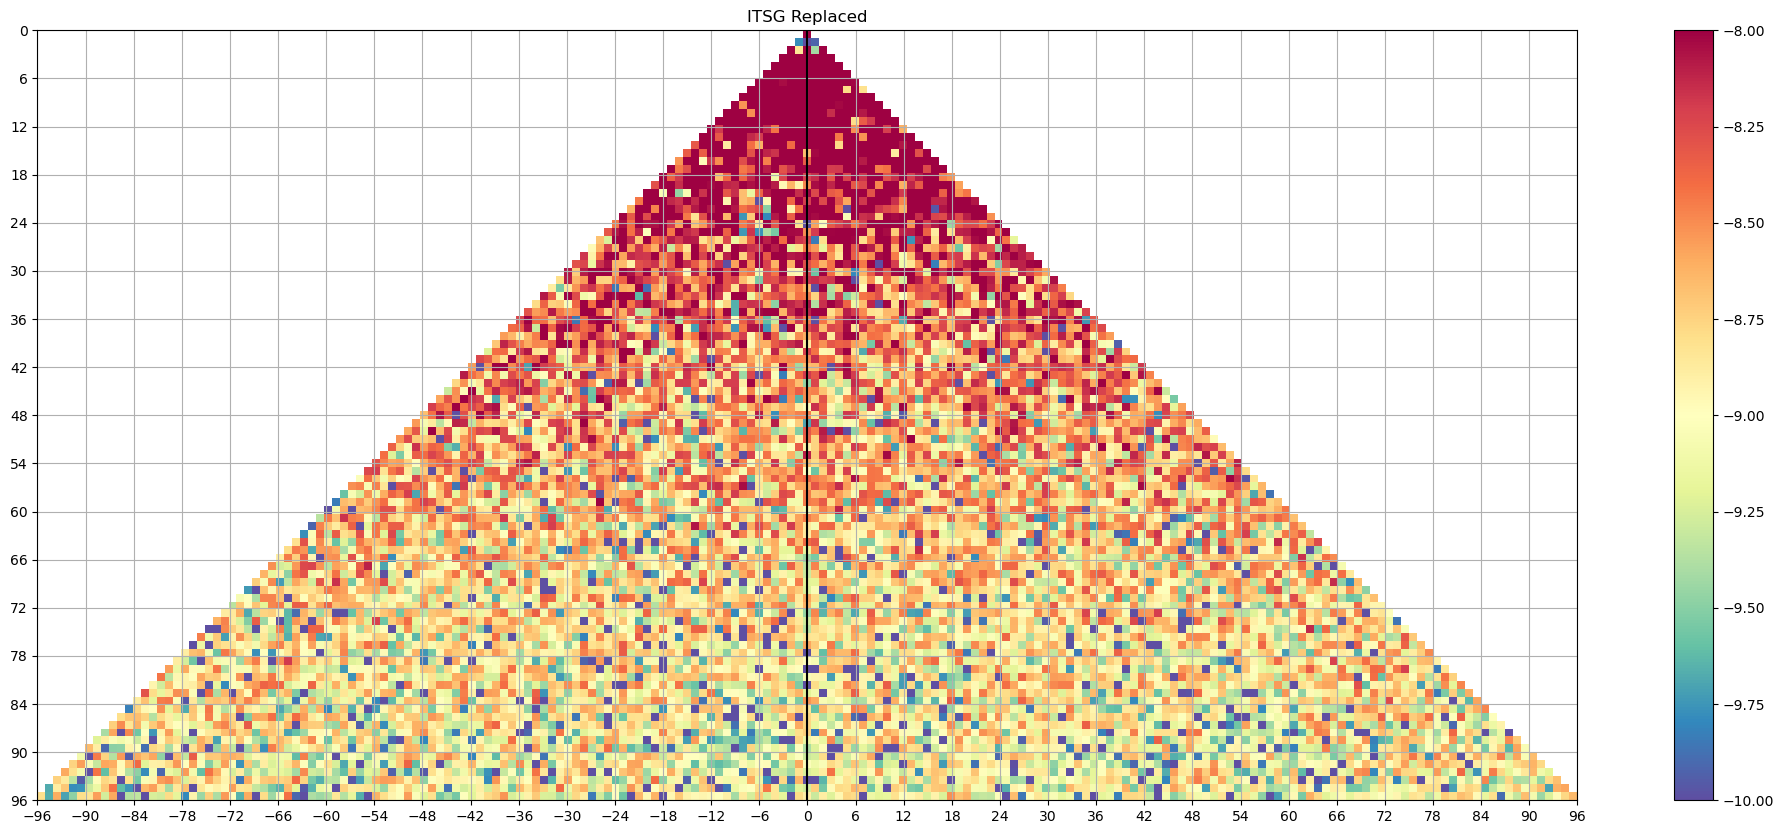

In [10]:
handle = sc_triplot(scmat=rep_sc, lmax=96, title="ITSG Replaced", vmin=-10, vmax=-8)

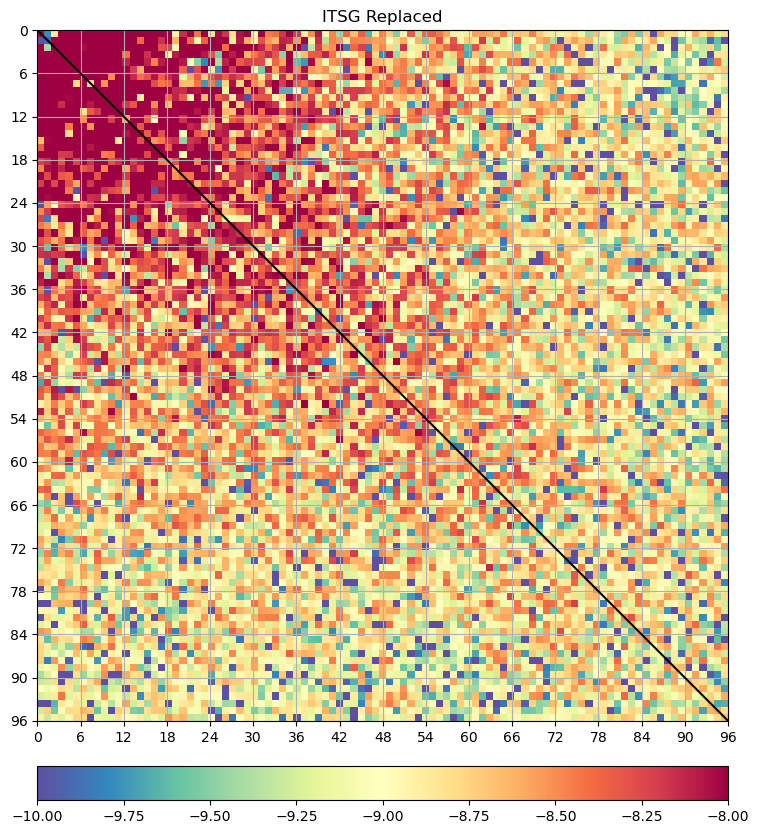

In [11]:
rep_cs = sc2cs.sc2cs(rep_sc)
handle2 = cs_sqplot(csmat=rep_cs, lmax=96, title="ITSG Replaced", vmin=-10, vmax=-8)

# Long Term Gravity Field

In [23]:
# load long term mean
long_mean_itsg = 'D:\\open_source\\pyshbundle\\pyshbundle\\data\\long_mean\\SH_long_mean_itsg.npy'
SH_long_mean_itsg = np.load(long_mean_itsg)

import pyshbundle.normalklm
normal_cs = pyshbundle.normalklm.normalklm(lmax=96, typ='wgs84')

# convert the format 
normal_sc = pyshbundle.cs2sc.cs2sc(normal_cs)


In [13]:
import pyshbundle.gaussian

W = pyshbundle.gaussian.gaussian(L=96, cap=500)

In [20]:
# basic computation
lmax = 96
# grid size
gs = 0.20
quant = 'gravity' 
grd = 'cell'
n = int(180/gs) 
h = 0 
jflag = 0

grid_y = int(180/gs)
grid_x = int(360/gs)

ff = pyshbundle.gshs.gshs(SH_long_mean_itsg, quant, grd, n, h, jflag)[0]

# Computing
grav_field = np.zeros([grid_y,grid_x], dtype ='longdouble')

grav_field[:,0:int(grid_x/2)] = ff[:,int(grid_x/2):]
grav_field[:,int(grid_x/2):] = ff[:,0:int(grid_x/2)]  

(<Figure size 1600x750 with 2 Axes>,
 <GeoAxesSubplot: title={'center': 'Title - Long Term Field'}, xlabel='Longitude', ylabel='Latitude'>)

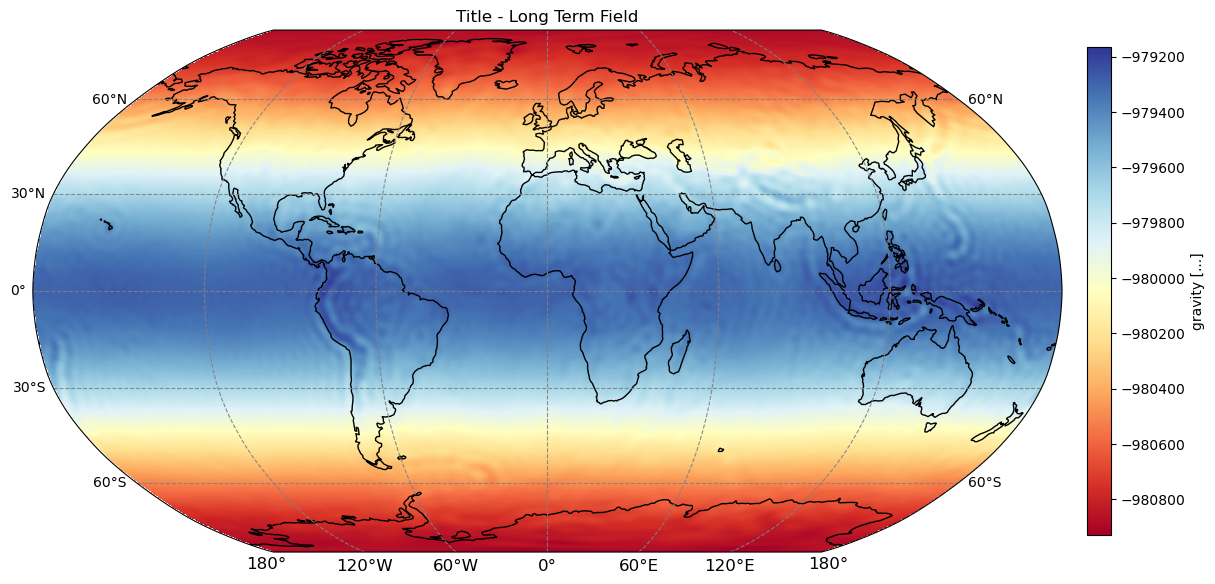

In [21]:
mapfield(field=grav_field, img_extent=(-180, 180, -90, 90), title="Long Term Field", colorbar_bounds=None)

# Normal Gravity Field 

In [24]:
# basic computation
lmax = 96
# grid size
gs = 0.20
quant = 'gravity' 
grd = 'cell'
n = int(180/gs) 
h = 0 
jflag = 0

grid_y = int(180/gs)
grid_x = int(360/gs)

ff = pyshbundle.gshs.gshs(normal_sc, quant, grd, n, h, jflag)[0]

# Computing
grav_field_norm = np.zeros([grid_y,grid_x], dtype ='longdouble')


grav_field_norm[:,0:int(grid_x/2)] = ff[:,int(grid_x/2):]
grav_field_norm[:,int(grid_x/2):] = ff[:,0:int(grid_x/2)]  

(<Figure size 1600x750 with 2 Axes>,
 <GeoAxesSubplot: title={'center': 'Title - Normal Gravity Field - WGS84 Ellipsoid'}, xlabel='Longitude', ylabel='Latitude'>)

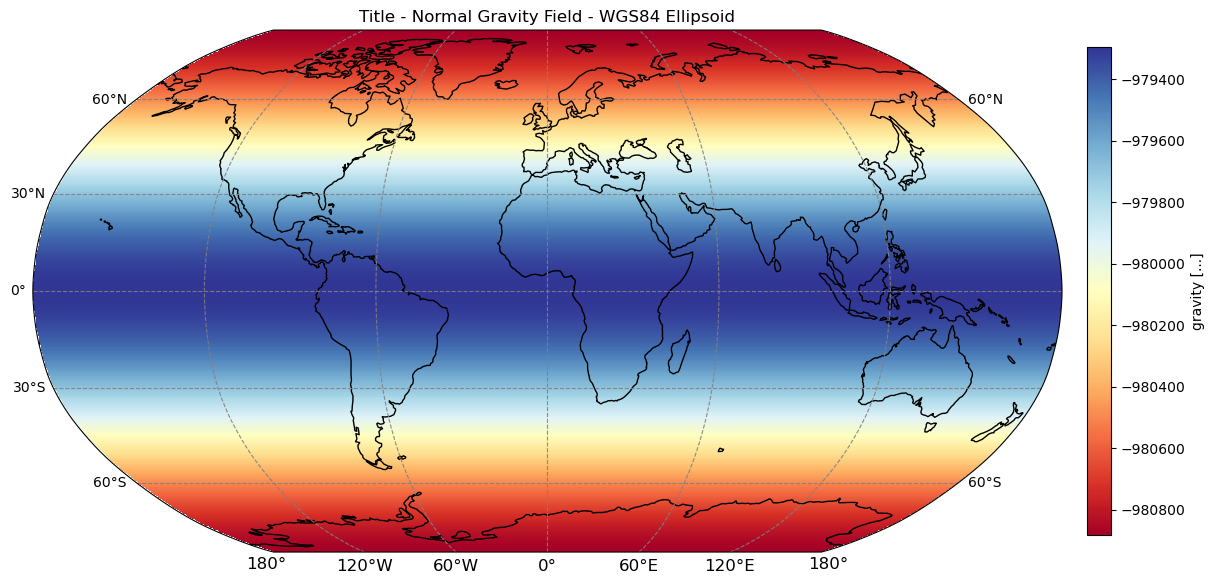

In [30]:
mapfield(field=grav_field_norm, img_extent=(-180, 180, -90, 90), title="Normal Gravity Field - WGS84 Ellipsoid", colorbar_bounds=None)

# Temporal Gravity Field

In [34]:
lmax = 96
# grid size
gs = 0.50
quant = 'gravity' 
grd = 'cell'
n = int(180/gs) 
h = 0 
jflag = 0

grid_y = int(180/gs)
grid_x = int(360/gs)

ff_tmp = pyshbundle.gshs.gshs(rep_sc, quant, grd, n, h, jflag)[0]

# Computing
grav_field_tmp = np.zeros([grid_y,grid_x], dtype ='longdouble')

grav_field_tmp[:,0:int(grid_x/2)] = ff_tmp[:,int(grid_x/2):]
grav_field_tmp[:,int(grid_x/2):] = ff_tmp[:,0:int(grid_x/2)]  

(<Figure size 1600x750 with 2 Axes>,
 <GeoAxesSubplot: title={'center': 'Title - Normal Gravity Field - WGS84 Ellipsoid'}, xlabel='Longitude', ylabel='Latitude'>)

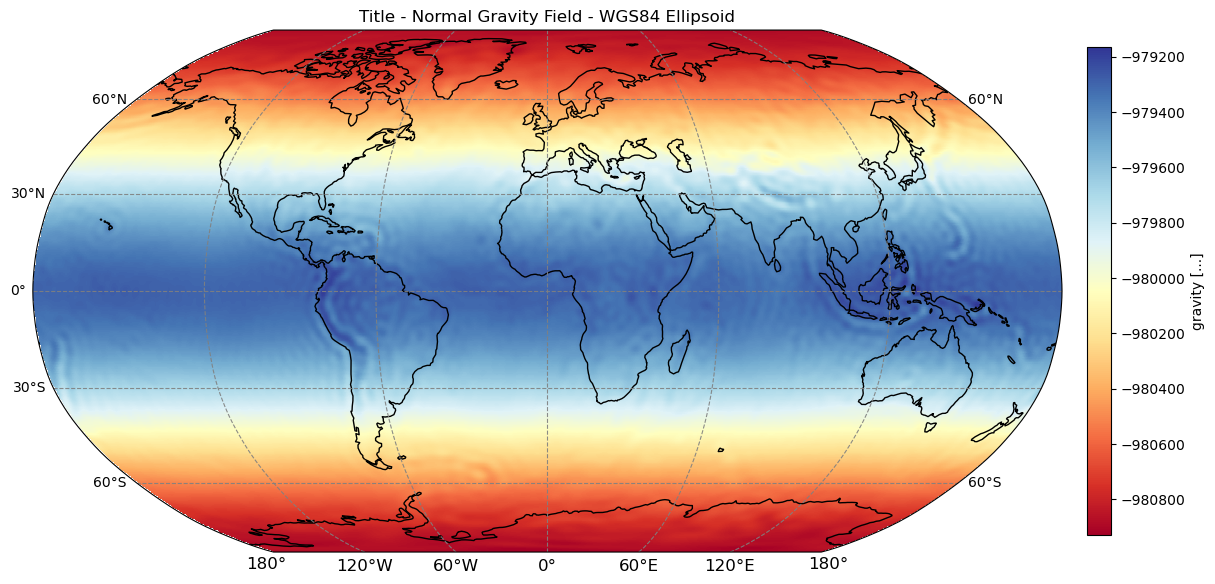

In [35]:
mapfield(field=grav_field_tmp, img_extent=(-180, 180, -90, 90), title="Temporal Gravity Field", colorbar_bounds=None)

# Gravity Anomalies

In [41]:
lmax = 96
# grid size
gs = 1.0
quant = 'gravity' 
grd = 'cell'
n = int(180/gs) 
h = 0 
jflag = 0

grid_y = int(180/gs)
grid_x = int(360/gs)

ff_tmp = pyshbundle.gshs.gshs(rep_sc-SH_long_mean_itsg, quant, grd, n, h, jflag)[0]

# Computing
grav_field_sub = np.zeros([grid_y,grid_x], dtype ='longdouble')

grav_field_sub[:,0:int(grid_x/2)] = ff_tmp[:,int(grid_x/2):]
grav_field_sub[:,int(grid_x/2):] = ff_tmp[:,0:int(grid_x/2)]  

(<Figure size 1600x750 with 2 Axes>,
 <GeoAxesSubplot: title={'center': 'Title - Gravity Anomalies with Vertical Stripe Noise'}, xlabel='Longitude', ylabel='Latitude'>)

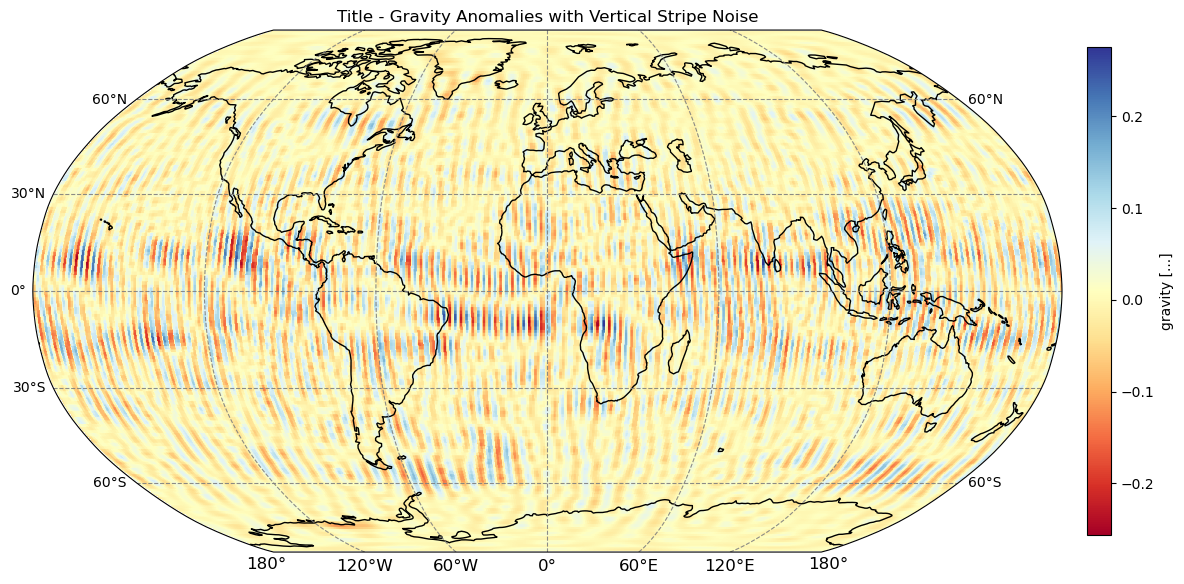

In [42]:
mapfield(field=grav_field_sub, img_extent=(-180, 180, -90, 90), title="Gravity Anomalies with Vertical Stripe Noise", colorbar_bounds=None)